<a href="https://colab.research.google.com/github/s20488/COV/blob/main/Anastasiia_Ponkratova_CV_L7_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Zaprojektuj samodzielnie przykładową sieć o architekturze autoencodera.
2. Wytrenuj sieć na zbiorze typu MNIST (nie może to być klasyczny MNIST ani FAshion MNIST).
3. Zwizualizuj obrazy testowe po transformacji przez bottleneck przy pomocy metody t-SNE.
4. Wytrenuj model tak, żeby poszczególne klasy były odseparowane na wykresie t-SNE.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

 94% 59.0M/62.6M [00:00<00:00, 204MB/s]
100% 62.6M/62.6M [00:00<00:00, 199MB/s]


In [ ]:
! unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
! pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras


In [ ]:
import numpy as np
import pandas as pd

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv2
from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv('/content/sign_mnist_train.csv')
train_df.shape

(27455, 785)

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_df = pd.read_csv('/content/sign_mnist_test.csv')
test_df.shape

(7172, 785)

In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df['label'].values

array([ 3,  6,  2, ..., 18, 17, 23])

In [ ]:
labels = train_df['label'].values

In [ ]:
unique_set = np.unique(np.array(labels))

<ipython-input-16-a5954a36108e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=labels, data=train_df, palette='Set2')


<Axes: xlabel='count'>

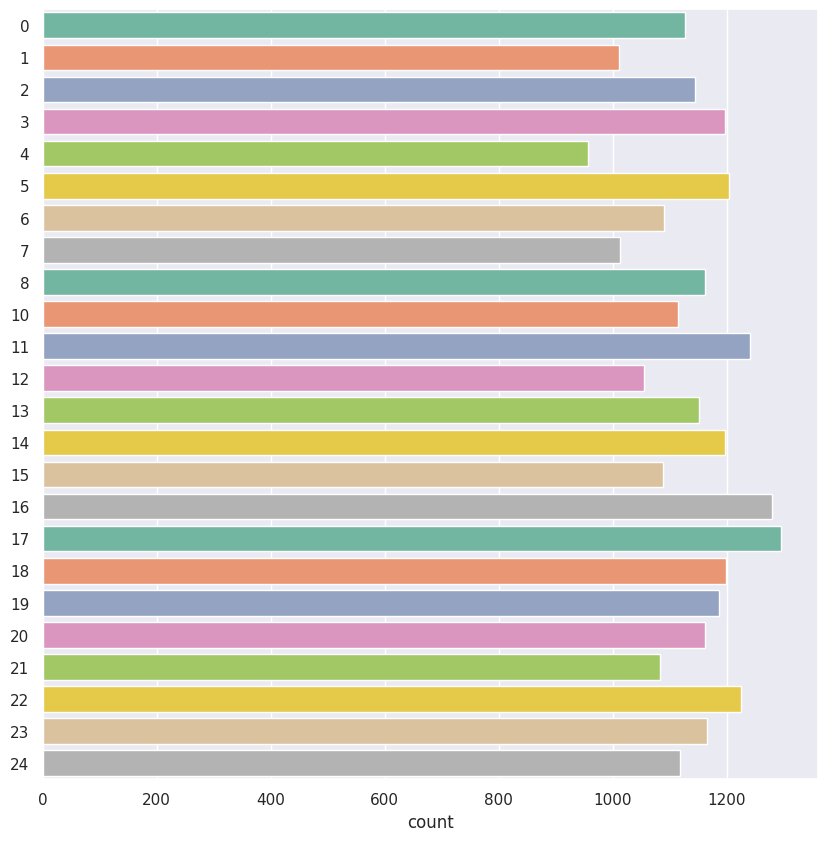

In [ ]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y=labels, data=train_df, palette='Set2')

In [ ]:
train_df.drop(['label'],axis=1,inplace=True)

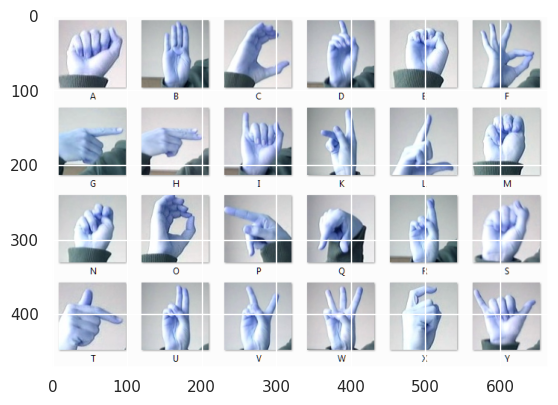

In [ ]:
img = cv2.imread('/content/amer_sign2.png')
plt.imshow(img)

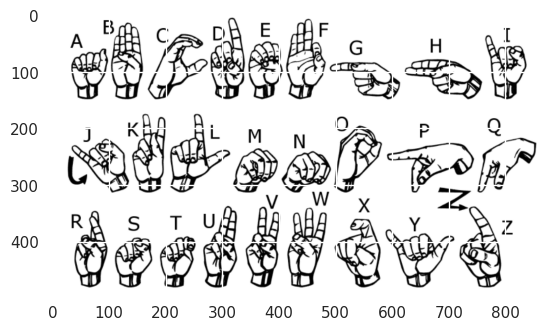

In [ ]:
img = cv2.imread('/content/american_sign_language.PNG')
plt.imshow(img)

In [ ]:
images = train_df.values
images = np.array([np.reshape (i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

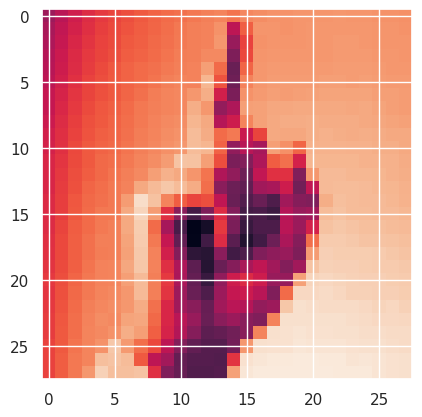

In [ ]:
plt.imshow(images[0].reshape(28, 28))

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
labels[:5]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=140)

print('Training Data shape : ',x_train.shape,  y_train.shape)
print('Testing Data shape : ',x_test.shape,  y_test.shape)

Training Data shape :  (21964, 784) (21964, 24)
Testing Data shape :  (5491, 784) (5491, 24)


In [ ]:
batch_size=256
EPOCHS = 50

In [ ]:
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])

x_train = x_train/255.
x_test = x_test/255.

(-0.5, 27.5, 27.5, -0.5)

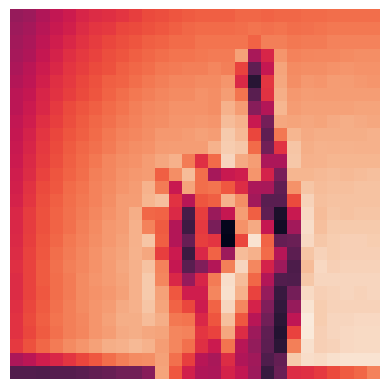

In [ ]:
plt.imshow(x_train[0].reshape(28,28))
plt.axis('off')

In [ ]:
input_img = tf.keras.layers.Input(shape=(784,), name = "input")

encoded = Dense(1024, activation='relu', name="emb_0")(input_img)
encoded = Dense(512, activation='relu', name="emb_1")(encoded)
encoded = Dense(256, activation='relu', name="emb_2")(encoded)
encoded = Dense(128, activation='relu', name="emb_3")(encoded)
encoded = Dense(64, activation='relu', name="emb_4")(encoded)
encoded = Dense(16, activation='relu', name="emb_5")(encoded)
latent_vector = Dense(2, activation='relu', name="latent_vector")(encoded)

In [ ]:
decoded = Dense(16, activation='relu', name="dec_1")(latent_vector)
decoded = Dense(64, activation='relu', name="dec_3")(decoded)
decoded = Dense(128, activation='relu', name="dec_4")(decoded)
decoded = Dense(256, activation='relu', name="dec_5")(decoded)
decoded = Dense(512, activation='relu', name="dec_6")(decoded)
decoded = Dense(1024, activation='relu', name="dec_7")(decoded)

output_layer = Dense(784, activation = 'sigmoid', name="output")(decoded)

In [ ]:
autoencoder = tf.keras.models.Model(input_img, output_layer)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 emb_0 (Dense)               (None, 1024)              803840    
                                                                 
 emb_1 (Dense)               (None, 512)               524800    
                                                                 
 emb_2 (Dense)               (None, 256)               131328    
                                                                 
 emb_3 (Dense)               (None, 128)               32896     
                                                                 
 emb_4 (Dense)               (None, 64)                8256      
                                                                 
 emb_5 (Dense)               (None, 16)                1040  

In [ ]:
encoder = tf.keras.models.Model(input_img, latent_vector)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 emb_0 (Dense)               (None, 1024)              803840    
                                                                 
 emb_1 (Dense)               (None, 512)               524800    
                                                                 
 emb_2 (Dense)               (None, 256)               131328    
                                                                 
 emb_3 (Dense)               (None, 128)               32896     
                                                                 
 emb_4 (Dense)               (None, 64)                8256      
                                                                 
 emb_5 (Dense)               (None, 16)                1040

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
auto_history = autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=batch_size,validation_data=(x_test, x_test))

Epoch 1/50
86/86 [==============================] - 13s 114ms/step - loss: 0.0283 - val_loss: 0.0232
Epoch 2/50
86/86 [==============================] - 12s 134ms/step - loss: 0.0215 - val_loss: 0.0204
Epoch 3/50
86/86 [==============================] - 11s 134ms/step - loss: 0.0202 - val_loss: 0.0195
Epoch 4/50
86/86 [==============================] - 11s 129ms/step - loss: 0.0193 - val_loss: 0.0192
Epoch 5/50
86/86 [==============================] - 13s 152ms/step - loss: 0.0189 - val_loss: 0.0188
Epoch 6/50
86/86 [==============================] - 13s 153ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 7/50
86/86 [==============================] - 11s 131ms/step - loss: 0.0186 - val_loss: 0.0185
Epoch 8/50
86/86 [==============================] - 12s 135ms/step - loss: 0.0201 - val_loss: 0.0193
Epoch 9/50
86/86 [==============================] - 11s 133ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 10/50
86/86 [==============================] - 10s 111ms/step - loss: 0.0189 - val_lo

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

172/172 [==============================] - 2s 9ms/step


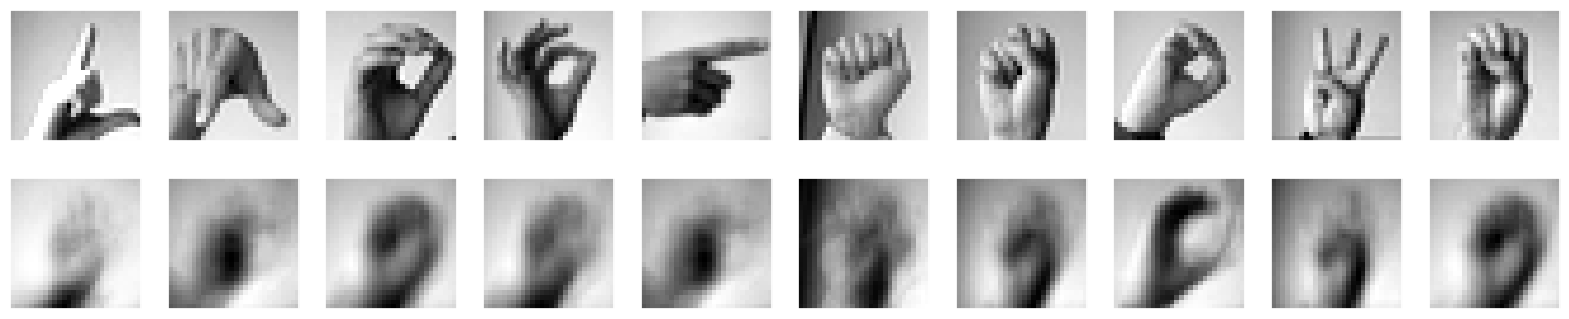

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
x_test_2d = TSNE(n_components=2).fit_transform(x_test_encoded)

22/22 [==============================] - 1s 31ms/step


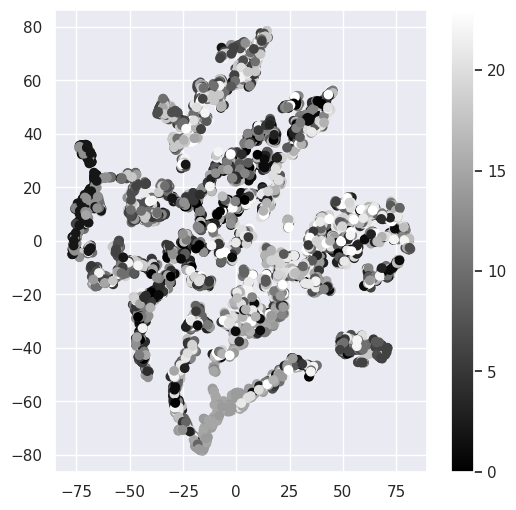

In [ ]:
y_test_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(6, 6))
plt.scatter(x_test_2d[:, 0], x_test_2d[:, 1], c=y_test_classes)
plt.colorbar()
plt.show()